# Redes Neuronales

## Numpy
- Explicación con animación red nueronal como class https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795 

In [4]:
import numpy as np
import math
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

In [5]:
x

array([-3.14159265, -3.13844949, -3.13530633, ...,  3.13530633,
        3.13844949,  3.14159265])

In [6]:
y

array([-1.22464680e-16, -3.14315906e-03, -6.28628707e-03, ...,
        6.28628707e-03,  3.14315906e-03,  1.22464680e-16])

In [7]:
# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 4286.227796856767
199 2845.000798136214
299 1889.7286968955013
399 1256.451405596373
499 836.5620151824882
599 558.1071379397937
699 373.41060137152476
799 250.87789933774008
899 169.56859449339672
999 115.60145252852887
1099 79.77318560171186
1199 55.9809086386942
1299 40.17690967391924
1399 29.676020644942575
1499 22.696575329814564
1599 18.056131131593684
1699 14.969743824805311
1799 12.916207850324156
1899 11.54934667482429
1999 10.639168821232143
Result: y = -0.016193124275506725 + 0.8954777615283979 x + 0.0027935833922759367 x^2 + -0.09884037836671389 x^3


## Pytorch

In [1]:
# https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
import torch 
print(torch.__version__)

1.11.0


In [12]:
print(torch.cuda.device_count())
torch.cuda.get_device_name(0)

1


'NVIDIA GeForce GTX 1050 Ti'

Tensors: Son como los array de numpy pero con capacidad de procesarlas en GPU, ademas de ofrecer funciones extras como rastro de las gradientes <br>
Conjunto de datos agrupados <br>
Tensores en matematica son como espacios matematicos

In [9]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
# device = torch.device("cpu")
device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 339.18408203125
199 242.3013153076172
299 173.84454345703125
399 125.46800231933594
499 91.2786636352539
599 67.11396789550781
699 50.03313446044922
799 37.958709716796875
899 29.422691345214844
999 23.387767791748047
1099 19.12085723876953
1199 16.10381507873535
1299 13.970422744750977
1399 12.461790084838867
1499 11.394913673400879
1599 10.640403747558594
1699 10.106781005859375
1799 9.729368209838867
1899 9.462424278259277
1999 9.27361011505127
Result: y = -0.02255202829837799 + 0.8552024364471436 x + 0.003890600521117449 x^2 + -0.0931115597486496 x^3


Red neuronal que me haga la operación "y" o la operación "o" (Perceptron)

In [31]:
w = np.random.rand(1,3) * 10
w_1 = np.round(w[0][0], 1)
w_2 = np.round(w[0][1], 1)
theta = np.round(w[0][2], 1) #bayes

In [33]:
print(w)
print(w_1)
print(w_2)

[[9.67675155 3.89446929 8.33991418]]
9.7
3.9


In [26]:
x = [ [0,0], [0,1], [1,0], [1,1]]
x_array = np.asarray(x)
# expected outputs (AND port is the product of each entry
out = x_array[:, 1] * x_array[:, 0]

In [29]:
print("x_array :",x_array)
print("Out :",out)

x_array : [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Out : [0 0 0 1]


In [34]:
 def step (net):
    if net >= 0:
        return 1
    else:
        return 0

In [35]:
#the error vector 
error = np.array([0,0,0,0])
for i in range(len(x)):
    f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
    error[i] = out[i] - f_net
E = np.sum(error)

In [36]:
E

-3

In [37]:
max_it = 1000
t = 1
learning_rate=0.1
vals = [[w_1, w_2, theta]]
while t < max_it & E != 0:
    for i in range(len(x)):
        f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
        error[i] = out[i] - f_net
        # Actualización de los pesos
        w_1 = w_1 + learning_rate * error[i] * x[i][0]
        w_2 = w_2 + learning_rate * error[i] * x[i][1]
        theta = theta + learning_rate*error[i]
    
    vals.append([w_1, w_2, theta])
    E = np.sum(error)
   # print('sum of errors', E)
    t = t+1

In [38]:
for i in range(len(x)):
        f_net = step(np.dot(np.asarray([w_1, w_2]) , x[i])  + theta)
        error[i] = out[i] - f_net

1

In [21]:
w_1 = w_1 + learning_rate * error[i] * x[i][0] 
w_2 = w_2 + learning_rate * error[i] * x[i][1]
theta = theta + learning_rate*error[i]

In [22]:
vals.append([w_1, w_2, theta])
E = np.sum(error)

In [ ]:
v

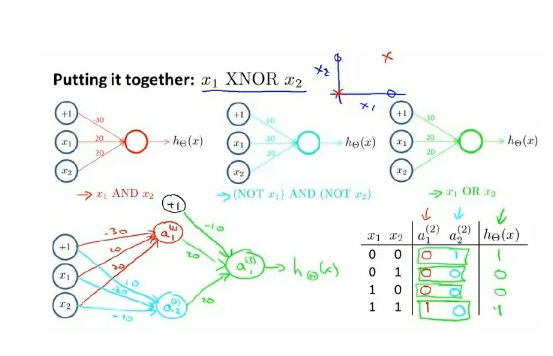

Matrix aleatoria de 2000x2000, y la mascara sera 9x9 y la convolusionamos la matrix 
<br>
punto a punto
<br>
en torch con los tensores (no vale la función convolusion)
<br>
deberia dar otra matrix de 2000x2000 a pero hay que tomar en cuenta que los bordes dejaran como espacio quiere que no se pierden